# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# ETL - Explore Transform Load

In [2]:
auto_df = pd.read_csv('automobiles.csv',index_col=0)

In [3]:
auto_df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,,,,,,,,,,,,,,,,,,,,,
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,118.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


The data we currently have , have already gone through the process of 
* Handling the Missing values & 
* EDA - Exploratory Data Analysis

from the ipynb file 'Analysing data with python (automobile csv Data Wrangling).ipynb'

# Data Exploration

In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 3 to -1
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   make               201 non-null    object 
 2   fuel-type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    float64
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    int64  
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non-null 

## Binning

* Lets Bin the Price column  into low, medium, high

In [5]:
bins = np.linspace(min(auto_df['price']),max(auto_df['price']) , 4)

In [6]:
price_groups_ = ['low','medium','high']

In [7]:
auto_df['price_binned'] = pd.cut( auto_df['price'],
                                bins,
                                labels = price_groups_,
                                include_lowest=True)

In [8]:
auto_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned
symboling,,,,,,,,,,,,,,,,,,,,,
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,low
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,medium
1,118.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,medium
2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,low
2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845,medium
-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045,medium
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485,medium


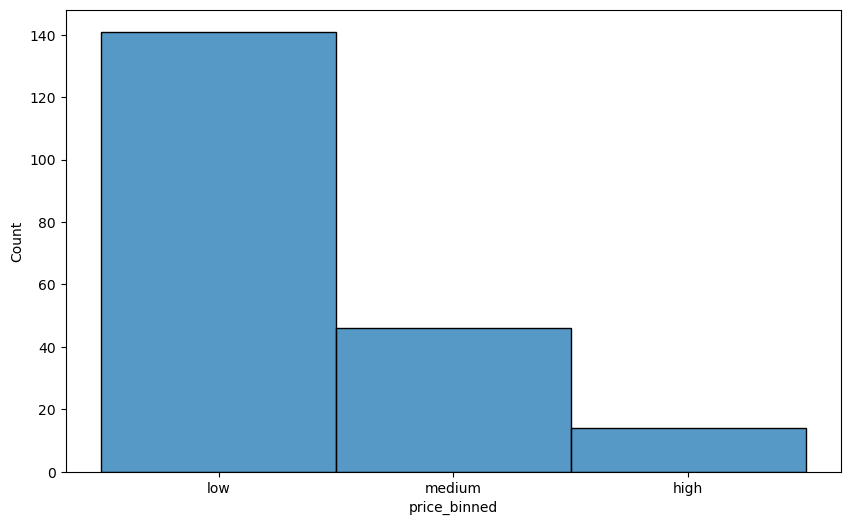

In [9]:
# an histogram of auto_df['price_binned']

plt.figure(figsize = (10,6))

sns.histplot(auto_df['price_binned'])

plt.show()

* Let focus on the fuel column 

In [10]:
auto_df['fuel-type'].value_counts()

fuel-type
gas       181
diesel     19
109         1
Name: count, dtype: int64

In [11]:
fuel_types = pd.get_dummies(auto_df['fuel-type'],prefix='_',dtype = 'int')

In [12]:
auto_df = pd.concat([auto_df,fuel_types],axis=1)

In [13]:
auto_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_binned,__109,__diesel,__gas
symboling,,,,,,,,,,,,,,,,,,,,,
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,13495,low,0,0,1
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,16500,medium,0,0,1
1,118.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,9.0,154.0,5000.0,19,26,16500,medium,0,0,1
2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,10.0,102.0,5500.0,24,30,13950,low,0,0,1
2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,8.0,115.0,5500.0,18,22,17450,medium,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,9.5,114.0,5400.0,23,28,16845,medium,0,0,1
-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,...,8.7,160.0,5300.0,19,25,19045,medium,0,0,1
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,8.8,134.0,5500.0,18,23,21485,medium,0,0,1


## lets convert the mpg to KmL

* the formula for converting the mpg to kml is to multiply it with 0.425144

In [14]:
auto_df['city-mpg'] = auto_df['city-mpg'] * 0.425144

In [15]:
auto_df['highway-mpg'] = auto_df['highway-mpg'] * 0.425144

In [16]:
auto_df.rename(columns = {'city-mpg':'city_kml','highway-mpg':'hiwy kml'},inplace=True)

In [17]:
auto_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city_kml,hiwy kml,price,price_binned,__109,__diesel,__gas
symboling,,,,,,,,,,,,,,,,,,,,,
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,8.928024,11.478888,13495,low,0,0,1
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,8.928024,11.478888,16500,medium,0,0,1
1,118.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,9.0,154.0,5000.0,8.077736,11.053744,16500,medium,0,0,1
2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,10.0,102.0,5500.0,10.203456,12.754320,13950,low,0,0,1
2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,8.0,115.0,5500.0,7.652592,9.353168,17450,medium,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,9.5,114.0,5400.0,9.778312,11.904032,16845,medium,0,0,1
-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,...,8.7,160.0,5300.0,8.077736,10.628600,19045,medium,0,0,1
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,8.8,134.0,5500.0,7.652592,9.778312,21485,medium,0,0,1


In [18]:
auto_df.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city_kml', 'hiwy kml', 'price',
       'price_binned', '__109', '__diesel', '__gas'],
      dtype='object')

In [19]:
auto_df[['length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore']]

,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore
symboling,,,,,,,,,
3,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47
3,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47
1,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68
2,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19
2,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19
...,...,...,...,...,...,...,...,...,...
-1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78
-1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78
-1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58


In [20]:
auto_df.rename(columns={"normalized-losses":"nrml_loss",
                      "num-of-doors":"nof_doors",
                       "body-style":"style",
                       "num-of-cylinders":"nof_cylndrs",
                       "compression-ratio":"cmprsn_RT",
                       "horsepower":"HP"
                      },inplace=True)

In [21]:
auto_df

,nrml_loss,make,fuel-type,aspiration,nof_doors,style,drive-wheels,engine-location,wheel-base,length,...,cmprsn_RT,HP,peak-rpm,city_kml,hiwy kml,price,price_binned,__109,__diesel,__gas
symboling,,,,,,,,,,,,,,,,,,,,,
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,8.928024,11.478888,13495,low,0,0,1
3,118.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,8.928024,11.478888,16500,medium,0,0,1
1,118.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,9.0,154.0,5000.0,8.077736,11.053744,16500,medium,0,0,1
2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,10.0,102.0,5500.0,10.203456,12.754320,13950,low,0,0,1
2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,8.0,115.0,5500.0,7.652592,9.353168,17450,medium,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,9.5,114.0,5400.0,9.778312,11.904032,16845,medium,0,0,1
-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,...,8.7,160.0,5300.0,8.077736,10.628600,19045,medium,0,0,1
-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,8.8,134.0,5500.0,7.652592,9.778312,21485,medium,0,0,1


In [22]:
auto_df.duplicated().sum()

0

## Using Groupby()

In [23]:
auto_df_grp = auto_df[['drive-wheels','style','price']]

In [24]:
auto_test_grp_df = auto_df_grp.groupby(['drive-wheels','style'], as_index = False).mean()
auto_test_grp_df

,drive-wheels,style,price
0,109,109,109.000000
1,4wd,hatchback,7603.000000
2,4wd,sedan,12647.333333
3,4wd,wagon,9095.750000
4,fwd,convertible,11595.000000
5,fwd,hardtop,8249.000000
6,fwd,hatchback,8396.387755
7,fwd,sedan,9811.800000
8,fwd,wagon,9997.333333
9,rwd,convertible,23949.600000


### Using Pivot

In [25]:
new_df = auto_test_grp_df.pivot_table(index='drive-wheels',columns='style', values='price')
new_df

style,109,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,,
109,109.0,NaN,NaN,NaN,NaN,NaN
4wd,NaN,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,NaN,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,NaN,23949.6,24202.714286,14337.777778,21808.057143,16994.222222


* Let us now separate the numerical columns to a new dataframe

In [26]:
auto_df_num = auto_df.select_dtypes(include=['int','float'])

In [27]:
auto_df_num.columns

Index(['nrml_loss', 'nof_doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'nof_cylndrs', 'engine-size', 'bore', 'stroke',
       'cmprsn_RT', 'HP', 'peak-rpm', 'city_kml', 'hiwy kml', 'price', '__109',
       '__diesel', '__gas'],
      dtype='object')

* Let us see more with a pairplot what this numerical data means

In [28]:
(auto_df_num==None).sum()

nrml_loss      0
nof_doors      0
wheel-base     0
length         0
width          0
height         0
curb-weight    0
nof_cylndrs    0
engine-size    0
bore           0
stroke         0
cmprsn_RT      0
HP             0
peak-rpm       0
city_kml       0
hiwy kml       0
price          0
__109          0
__diesel       0
__gas          0
dtype: int64

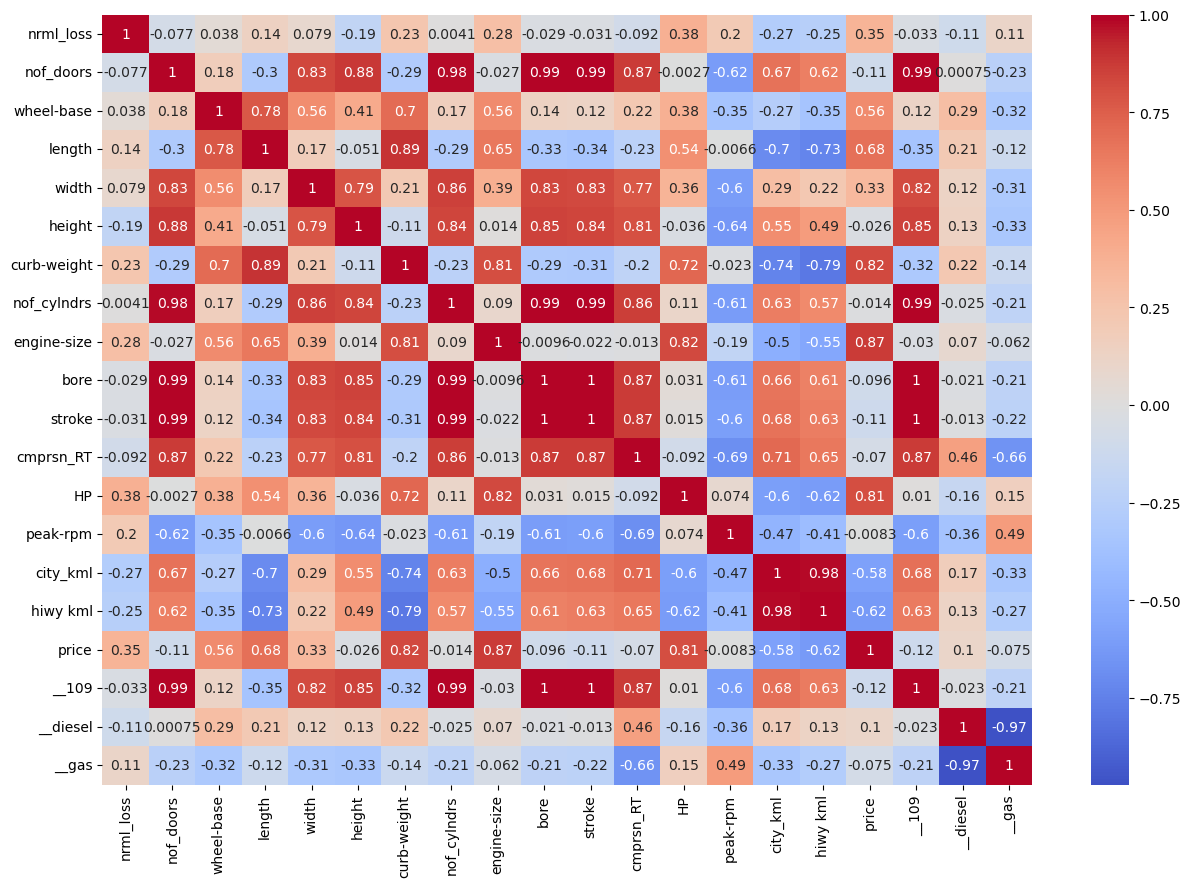

In [29]:
corr = auto_df_num.corr()

# Create a mask for the negative values
mask = corr < -1


def annot_func(data, mask):
    annot = data.copy()
    annot[mask] = np.nan
    return annot

plt.figure(figsize=(15,10))

# Plot the heatmap
sns.heatmap(corr, annot=annot_func(corr, mask), mask=mask, cmap='coolwarm', center=0)

plt.show()

* From the heatmap above we understood that the price variable is affected by these columns only so we will create a new variable called 'initiator' which would have all the columns which has the positive correlation towards the price that are 

[ 'nrml_loss', 
'nof_doors', 
'wheel-base', 
'length', 
'width',
'height', 
'curb-weight', 
'nof_cylndrs', 
'engine-size', 
'bore', 'stroke',
'cmprsn_RT', 
'HP', 
'peak-rpm'] .  

In [30]:
# initiator = auto_df_num[[ 'nrml_loss', 'nof_doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'nof_cylndrs', 'engine-size', 'bore', 'stroke', 'cmprsn_RT', 'HP','price'] ]
# price = auto_df_num['price']

+ Let us see with the help of boxplot values for all these numerical columns

In [31]:

auto_df_num.head(5)

# print()
# print(price.head(5))

,nrml_loss,nof_doors,wheel-base,length,width,height,curb-weight,nof_cylndrs,engine-size,bore,stroke,cmprsn_RT,HP,peak-rpm,city_kml,hiwy kml,price,__109,__diesel,__gas
symboling,,,,,,,,,,,,,,,,,,,,
3,118.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,8.928024,11.478888,13495,0,0,1
3,118.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,8.928024,11.478888,16500,0,0,1
1,118.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,8.077736,11.053744,16500,0,0,1
2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,10.203456,12.754320,13950,0,0,1
2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,7.652592,9.353168,17450,0,0,1


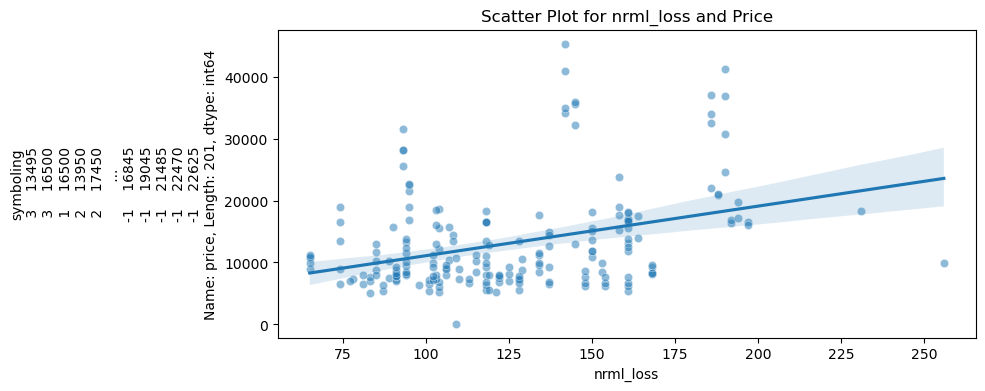

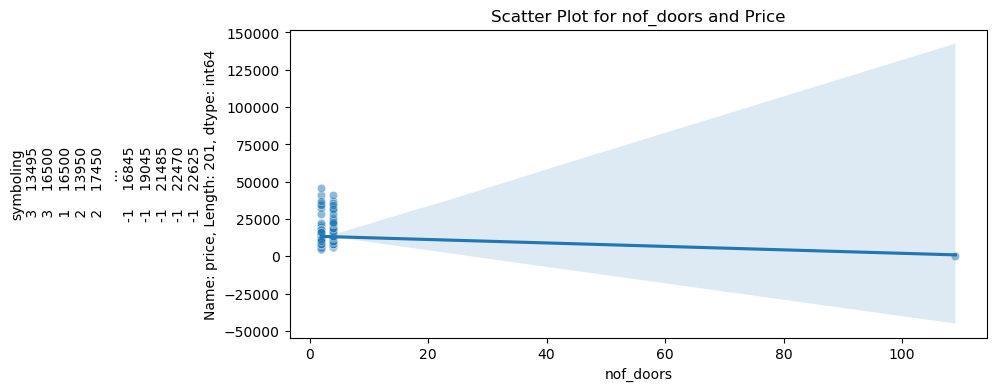

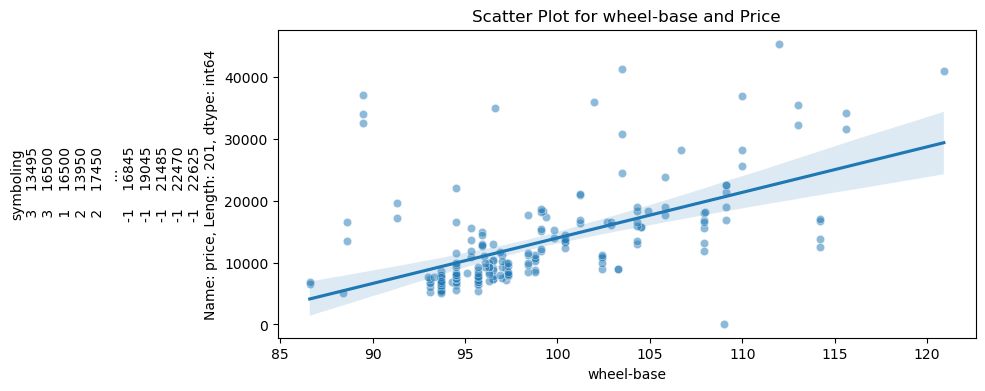

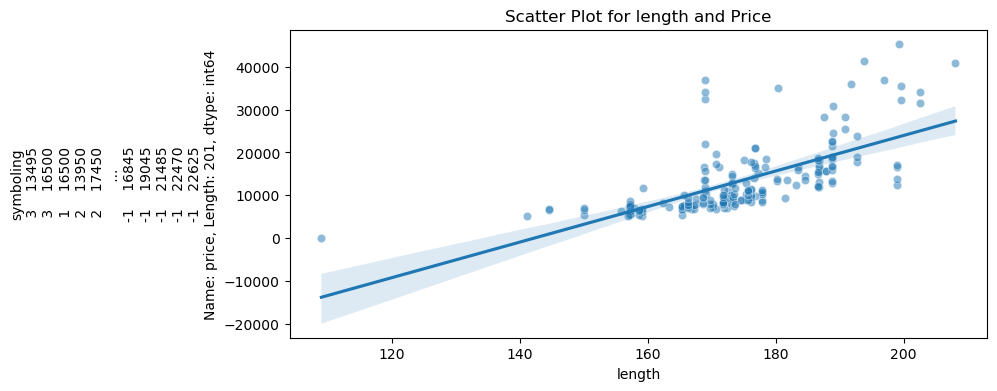

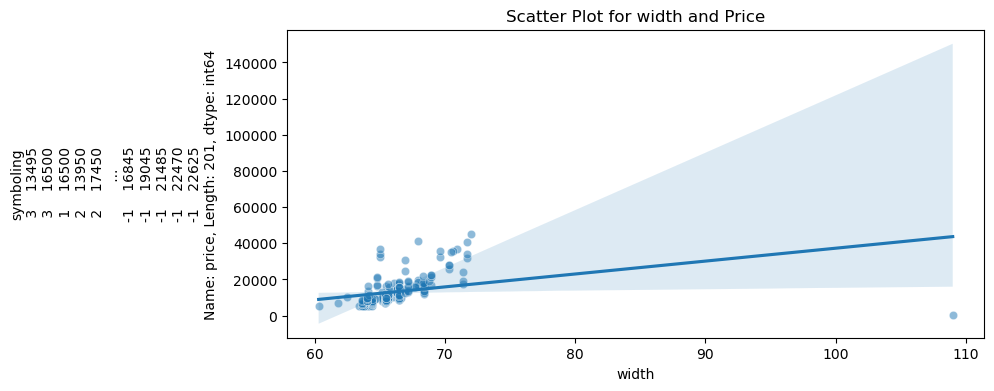

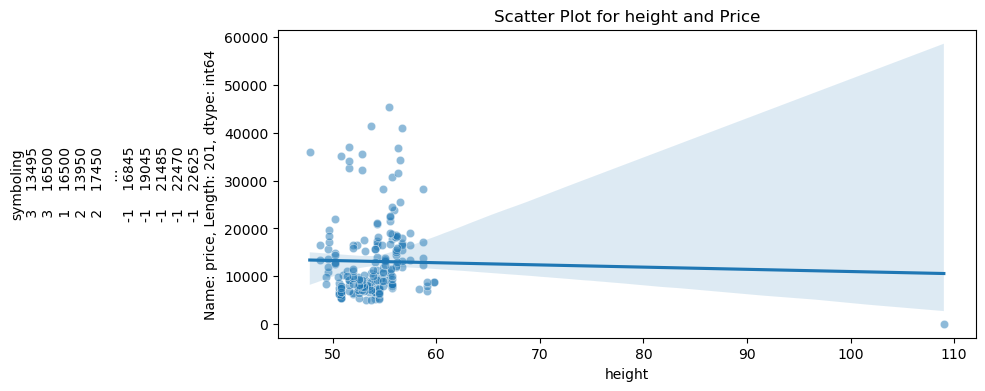

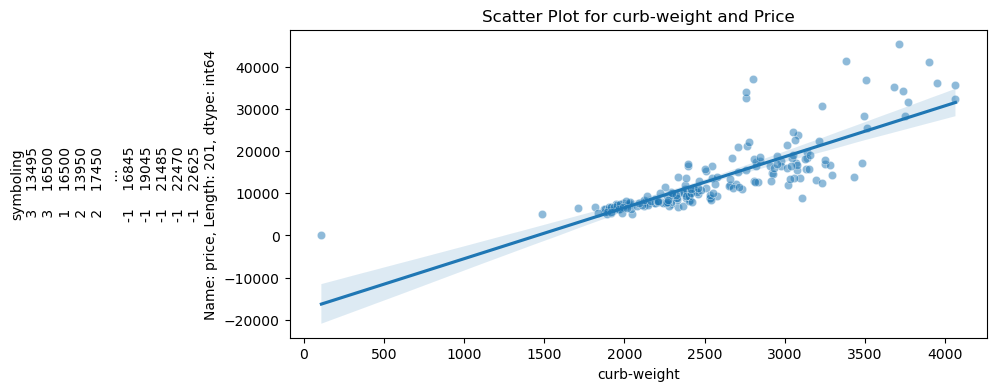

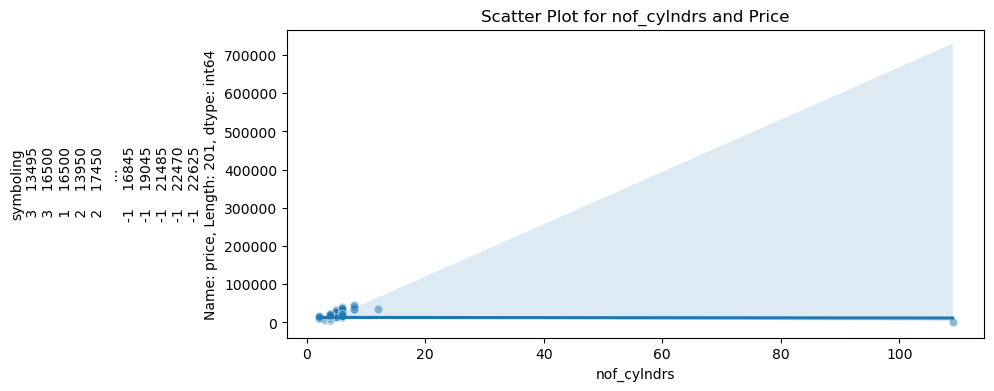

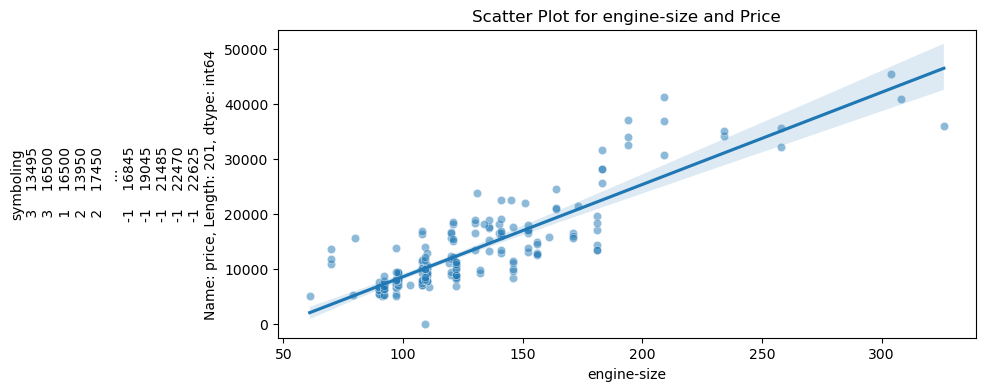

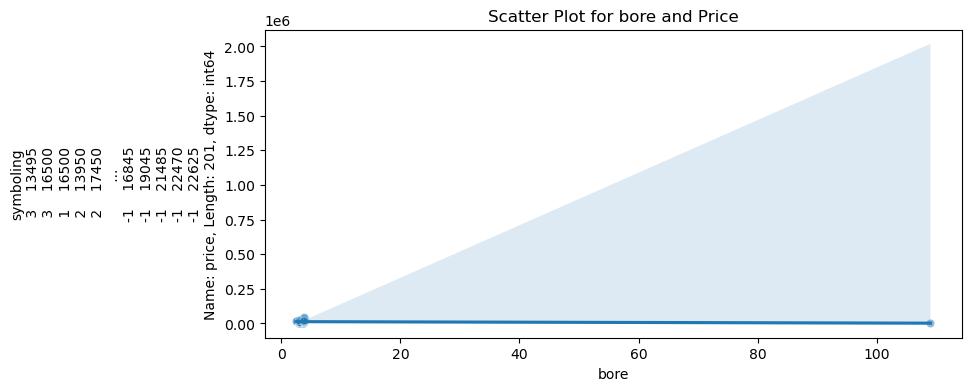

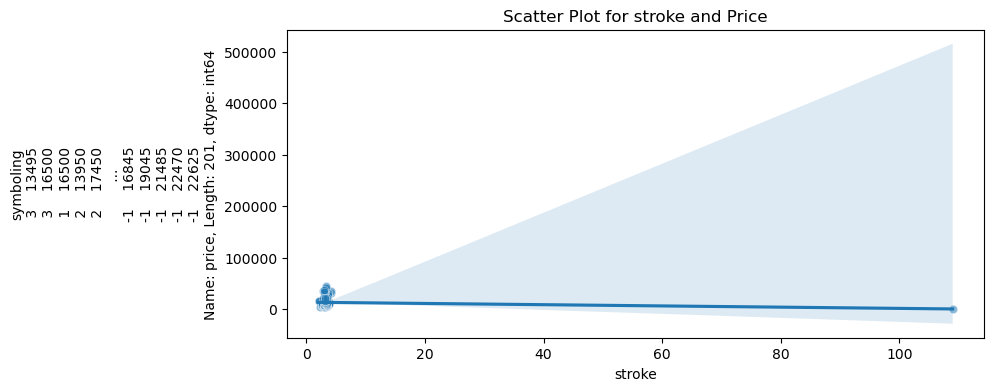

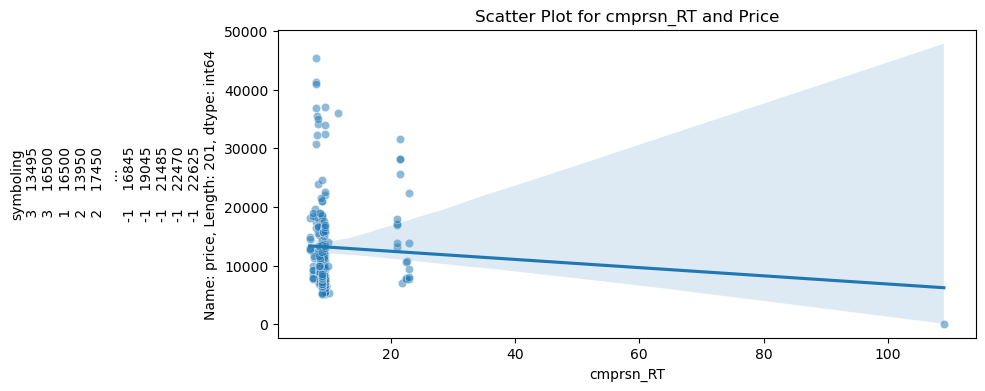

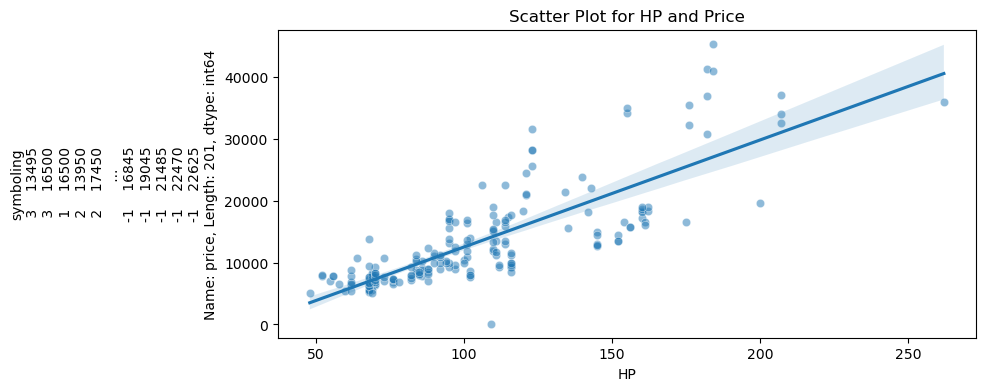

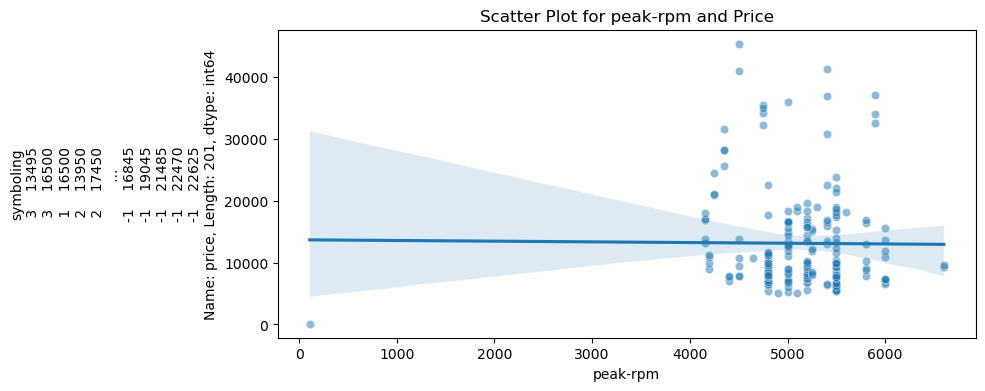

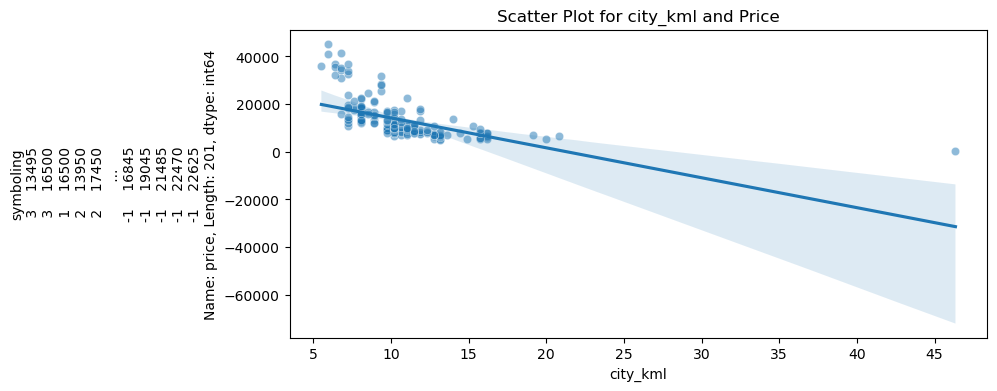

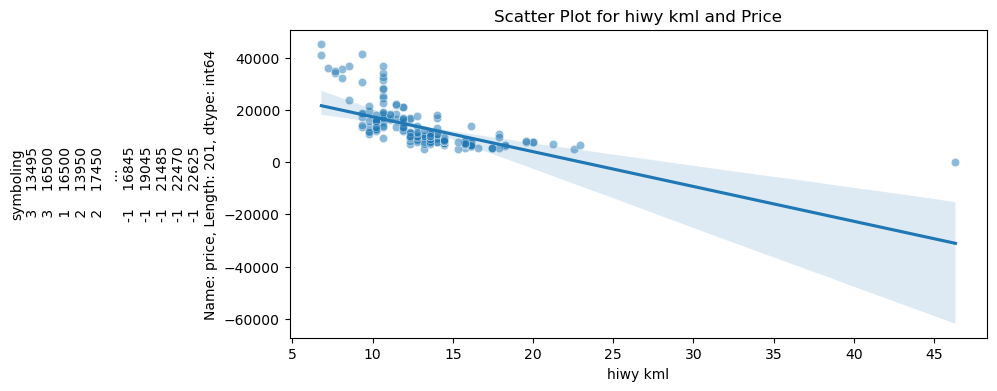

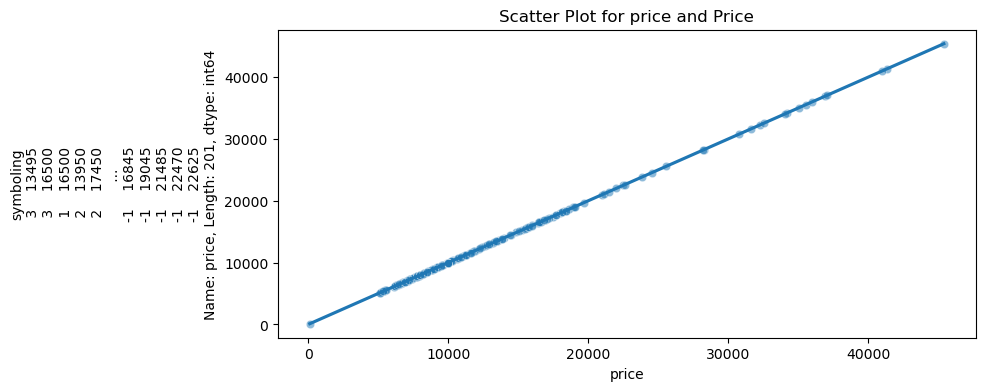

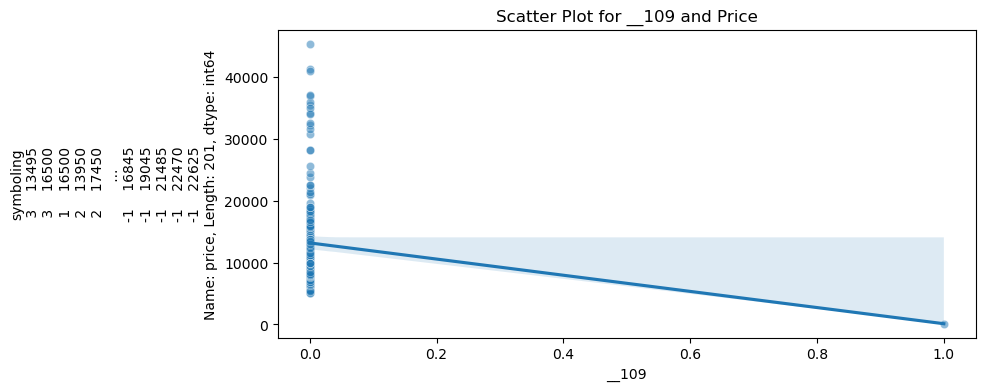

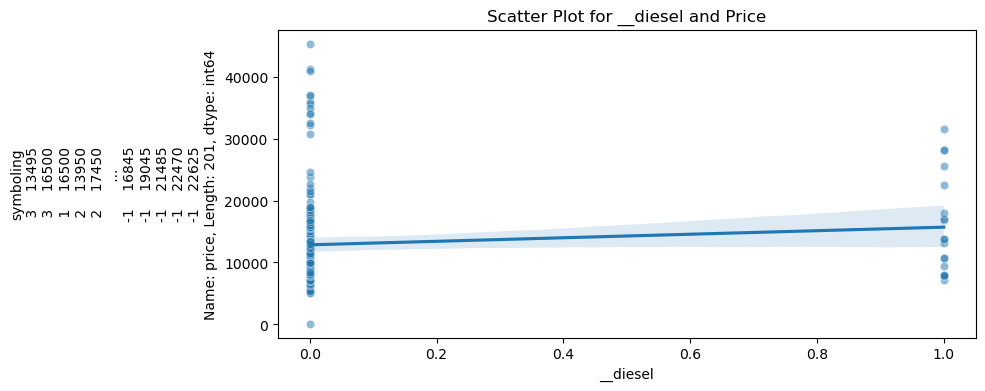

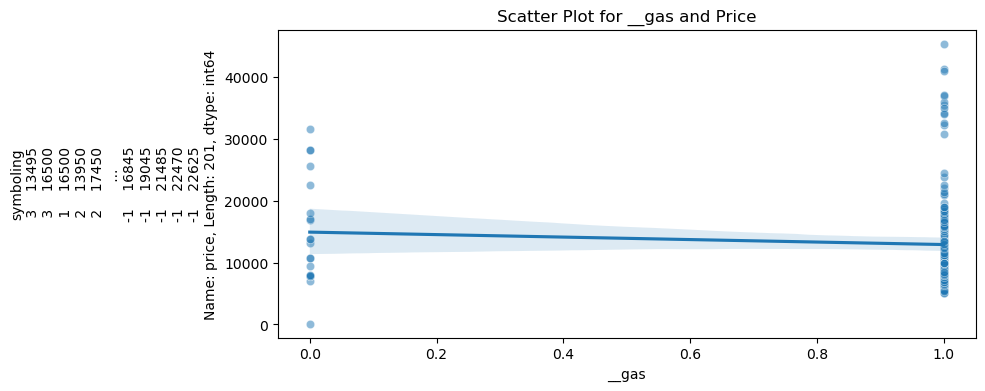

In [32]:

for i in auto_df_num.columns:
    plt.figure(figsize=(9,4))
    
    sns.scatterplot(data =auto_df_num ,x = i , y = 'price', alpha=.5)
    sns.regplot(data = auto_df_num ,x = i , y ='price',scatter=False)
    plt.xlabel(f"{i}")
    plt.ylabel(f"{auto_df_num['price']}")
    plt.title(f"Scatter Plot for {i} and Price")
    plt.show()

- From the above graph we can understand that from the above columns that only some columns are having a slight linear regression feature to the graph because those can actually affect the price 

* So our new columns include = { "wheel-base", "HP", "length" , "width", "curb-weight" ,"bore", "engine-size" , "nof_cylndrs" } 

# Data Transformation & Feature Engineering

In [33]:
initiator = auto_df_num[["nrml_loss", "wheel-base", "length", "width", "height","curb-weight", "nof_cylndrs", 
                       "engine-size", "bore", "HP", "peak-rpm" , "city_kml", "hiwy kml" , "price"]]

## Here we will perform Pearson Correlation

### Pearson Correlation Analysis

P-Value for the correlation :-

* 0.0001 = Strong
* 0.05 =   Moderate
* 0.1  =  Weak
* 0  = No

P-corr are values that are :
* -1 => large negative 
* +1 => large positive
* 0  => no correlation

In [34]:
from scipy import stats 

In [35]:
initiator.head()

,nrml_loss,wheel-base,length,width,height,curb-weight,nof_cylndrs,engine-size,bore,HP,peak-rpm,city_kml,hiwy kml,price
symboling,,,,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111.0,5000.0,8.928024,11.478888,13495
3,118.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111.0,5000.0,8.928024,11.478888,16500
1,118.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,154.0,5000.0,8.077736,11.053744,16500
2,164.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,102.0,5500.0,10.203456,12.754320,13950
2,164.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,115.0,5500.0,7.652592,9.353168,17450


In [36]:
auto_df_num.head(3)

,nrml_loss,nof_doors,wheel-base,length,width,height,curb-weight,nof_cylndrs,engine-size,bore,stroke,cmprsn_RT,HP,peak-rpm,city_kml,hiwy kml,price,__109,__diesel,__gas
symboling,,,,,,,,,,,,,,,,,,,,
3,118.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,8.928024,11.478888,13495,0,0,1
3,118.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,8.928024,11.478888,16500,0,0,1
1,118.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,8.077736,11.053744,16500,0,0,1


In [37]:
# the values for the independent variables

pearson_X_comparison_val = initiator.iloc[:,:13]
pearson_Y_val = initiator['price']

In [38]:
pearson_X_comparison_val.head(2)

,nrml_loss,wheel-base,length,width,height,curb-weight,nof_cylndrs,engine-size,bore,HP,peak-rpm,city_kml,hiwy kml
symboling,,,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111.0,5000.0,8.928024,11.478888
3,118.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111.0,5000.0,8.928024,11.478888


In [39]:
pearson_Y_val[:5]

symboling
3    13495
3    16500
1    16500
2    13950
2    17450
Name: price, dtype: int64

In [40]:
# the correlation coefficient for the dataframe pearson_X_comparison_val is !

pearson_coef_val, p_val = stats.pearsonr(pearson_X_comparison_val['hiwy kml'],pearson_Y_val)


In [41]:
print(f"pearson_coefficient : {pearson_coef_val} , p value : {p_val}")

pearson_coefficient : -0.6213854514083842 , p value : 7.405451907278584e-23


In [42]:
# a for loop for displaying all the correlations which has strong or moderate and print and save it in
strong_cols = []
for col in auto_df_num.columns :
    prsn_corr, p_val  = stats.pearsonr(auto_df_num[col] , pearson_Y_val)
    print(f"pearson correlation for the column {col} is  : \ncorrelation : {prsn_corr} ,  P Value is : {p_val}")
    if p_val <= 0.0001 :
        print(f"The column {col} has strong correlation ")
        strong_cols.append(col)
    elif 0.0001 < p_val <= 0.05:
        print(f" the column {col} has moderate correlation")
        strong_cols.append(col)
    else:
        print("No correlation")
    print()
    
print(strong_cols)

pearson correlation for the column nrml_loss is  : 
correlation : 0.3537559925696345 ,  P Value is : 2.5822806249315043e-07
The column nrml_loss has strong correlation 

pearson correlation for the column nof_doors is  : 
correlation : -0.1091798576850524 ,  P Value is : 0.12286630542221234
No correlation

pearson correlation for the column wheel-base is  : 
correlation : 0.5618288025498396 ,  P Value is : 4.054012124464529e-18
The column wheel-base has strong correlation 

pearson correlation for the column length is  : 
correlation : 0.6835418013965626 ,  P Value is : 5.076076468934917e-29
The column length has strong correlation 

pearson correlation for the column width is  : 
correlation : 0.32961122732907466 ,  P Value is : 1.7695521820954646e-06
The column width has strong correlation 

pearson correlation for the column height is  : 
correlation : -0.02646469471658685 ,  P Value is : 0.7092027107308819
No correlation

pearson correlation for the column curb-weight is  : 
correl

    -> So the correlated columns are as follows :

* 'nrml_loss', 'wheel-base', 'length', 'width', 'curb-weight', 'nof_cylndrs', 'engine-size', 'bore', 'HP', 'city_kml', 'hiwy kml', 'price'

In [43]:
initiator.drop(columns={'height','peak-rpm'},inplace=True)

C:\Users\preda\AppData\Local\Temp\ipykernel_24516\2780529288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initiator.drop(columns={'height','peak-rpm'},inplace=True)


In [44]:
initiator_cols = initiator.columns 

# Data Normalization or Feature Scaling 

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Normalization technique

In [46]:
mms =  MinMaxScaler()

In [47]:
X1 = mms.fit_transform(initiator)

In [48]:
X1 = pd.DataFrame(X1,columns=initiator_cols)

In [49]:
X1.describe()

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.315487,0.356193,0.654618,0.119148,0.615056,0.026968,0.248118,0.012357,0.259334,0.130908,0.161665,0.287196
std,0.184681,0.177662,0.132716,0.075900,0.137784,0.069682,0.156841,0.070057,0.174351,0.090850,0.094136,0.176461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.157068,0.230321,0.578204,0.078029,0.514531,0.018692,0.139623,0.005730,0.102804,0.062500,0.096774,0.169261
50%,0.277487,0.303207,0.647830,0.106776,0.582512,0.018692,0.218868,0.007233,0.219626,0.114583,0.150538,0.223797
75%,0.445026,0.460641,0.751766,0.135524,0.711903,0.018692,0.301887,0.009863,0.317757,0.177083,0.193548,0.361904
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standardization technique

In [50]:
sS = StandardScaler()

In [51]:
X2 = sS.fit_transform(initiator)

In [52]:
X2 = pd.DataFrame(X2,columns=initiator_cols)

In [53]:
X2.describe()

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml,price
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,3.535038e-17,-3.305261e-15,-2.474527e-16,3.402475e-16,2.474527e-16,2.651279e-17,-5.081618e-17,-3.535038e-17,1.502391e-16,2.960595e-16,-6.628197e-16,-2.651279e-17
std,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00
min,-1.712543e+00,-2.009892e+00,-4.944772e+00,-1.573711e+00,-4.475057e+00,-3.879801e-01,-1.585923e+00,-1.768260e-01,-1.491144e+00,-1.444518e+00,-1.721642e+00,-1.631600e+00
25%,-8.599366e-01,-7.102594e-01,-5.772073e-01,-5.431011e-01,-7.314029e-01,-1.190698e-01,-6.934812e-01,-9.483284e-02,-9.000334e-01,-7.548551e-01,-6.910497e-01,-6.700058e-01
50%,-2.062718e-01,-2.989834e-01,-5.127024e-02,-1.634026e-01,-2.367845e-01,-1.190698e-01,-1.869603e-01,-7.332643e-02,-2.283168e-01,-1.801359e-01,-1.184982e-01,-3.601784e-01
75%,7.031747e-01,5.893729e-01,7.338243e-01,2.162959e-01,7.046453e-01,-1.190698e-01,3.436806e-01,-3.569021e-02,3.359251e-01,5.095272e-01,3.395430e-01,4.244249e-01
max,3.715717e+00,3.632816e+00,2.608904e+00,1.163437e+01,2.800798e+00,1.399872e+01,4.805888e+00,1.413300e+01,4.258750e+00,9.590090e+00,8.927816e+00,4.049530e+00


* -> We will move forward with the normalization technique where the min is 0 and the maximum value is 1

In [54]:
# From here on we will be working with normalized data instead of standardized data


# So lets split the data into x and y

x = X1[["nrml_loss", "wheel-base", "length", "width","curb-weight", "nof_cylndrs", 
                       "engine-size", "bore", "HP", "city_kml", "hiwy kml"]]
y = X1['price']


# MODEL SELECTION

# Machine Learning Algorithms Applications

## Linear Regression

In [55]:
# importing the MSE library from the metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.model_selection import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## For Single Linear Regression we will be using two columns:

that are "engine-size" column which is a (independent variable) and "price" column as(dependent variable) 

In [56]:
A = initiator['engine-size']
B = initiator['price']
print(A.head(5))
print(B.head(5))

symboling
3    130
3    130
1    152
2    109
2    136
Name: engine-size, dtype: int64
symboling
3    13495
3    16500
1    16500
2    13950
2    17450
Name: price, dtype: int64


Here we create an object for the Linear Regression called 'sLr'

In [57]:
A = A.values.reshape(-1,1)
B = B.values.reshape(-1,1)
print(A)
print(B)

[[130]
 [130]
 [152]
 [109]
 [136]
 [136]
 [136]
 [136]
 [131]
 [108]
 [108]
 [164]
 [164]
 [164]
 [209]
 [209]
 [209]
 [ 61]
 [ 90]
 [ 90]
 [ 90]
 [ 90]
 [ 98]
 [ 90]
 [ 90]
 [ 90]
 [ 98]
 [122]
 [156]
 [ 92]
 [ 92]
 [ 79]
 [ 92]
 [ 92]
 [ 92]
 [ 92]
 [110]
 [110]
 [110]
 [110]
 [110]
 [110]
 [111]
 [119]
 [258]
 [258]
 [326]
 [ 91]
 [ 91]
 [ 91]
 [ 91]
 [ 91]
 [ 70]
 [ 70]
 [ 70]
 [ 80]
 [122]
 [122]
 [122]
 [122]
 [122]
 [122]
 [140]
 [109]
 [183]
 [183]
 [183]
 [183]
 [234]
 [234]
 [308]
 [304]
 [140]
 [ 92]
 [ 92]
 [ 92]
 [ 98]
 [110]
 [122]
 [156]
 [156]
 [156]
 [122]
 [122]
 [110]
 [110]
 [ 97]
 [103]
 [ 97]
 [ 97]
 [ 97]
 [ 97]
 [ 97]
 [ 97]
 [ 97]
 [ 97]
 [120]
 [120]
 [181]
 [181]
 [181]
 [181]
 [181]
 [181]
 [120]
 [152]
 [120]
 [152]
 [120]
 [152]
 [120]
 [152]
 [120]
 [152]
 [134]
 [ 90]
 [ 98]
 [ 90]
 [ 90]
 [ 98]
 [122]
 [156]
 [151]
 [194]
 [194]
 [194]
 [132]
 [132]
 [121]
 [121]
 [121]
 [121]
 [121]
 [121]
 [ 97]
 [108]
 [108]
 [108]
 [108]
 [108]
 [108]
 [108]
 [108]

## Normalized Single Linear Regression values

In [58]:
# here we define and assign object of a linear regression to a variable named sLr

sLr = LinearRegression()

In [59]:
# we will try to normalize the data here and see what actually happens and lets see if we can denormalize it later
a = MinMaxScaler()
b = MinMaxScaler()


In [60]:
# normalizing the value
a_norml = a.fit_transform(A)
b_norml = b.fit_transform(B)

In [61]:
# then we fit the model first that is A,y

sLr.fit(a_norml,b_norml)


LinearRegression()

In [62]:
# lets the check the score of the data here and see how much accuracy we will get

sLr.score(a_norml,b_norml)

0.7569467571564972

As you can see that we have got the accuracy of 76 % and we will now move forward with the data and see what happens now

In [63]:
predicted_val = sLr.predict(b_norml)

predicted_val

array([[0.33363112],
       [0.39857743],
       [0.39857743],
       [0.34346492],
       [0.41910954],
       [0.37156149],
       [0.42472885],
       [0.45088027],
       [0.55797143],
       [0.39706453],
       [0.40776284],
       [0.4951864 ],
       [0.49810412],
       [0.57288423],
       [0.70677519],
       [0.93489773],
       [0.8390452 ],
       [0.15329437],
       [0.17801935],
       [0.18407092],
       [0.16239333],
       [0.17979159],
       [0.21393973],
       [0.17659291],
       [0.18659961],
       [0.2064185 ],
       [0.22692899],
       [0.23477442],
       [0.32215476],
       [0.18199609],
       [0.19012249],
       [0.15865433],
       [0.18307673],
       [0.19604438],
       [0.1996321 ],
       [0.1996321 ],
       [0.21259974],
       [0.23853504],
       [0.23313185],
       [0.26447033],
       [0.32174411],
       [0.26555097],
       [0.18860959],
       [0.28074473],
       [0.73897818],
       [0.81030025],
       [0.82002598],
       [0.154

In [64]:
new_pred_price = b.inverse_transform(predicted_val)
new_pred_price

array([[15219.48721124],
       [18160.9702275 ],
       [18160.9702275 ],
       [15664.86983101],
       [19090.88998306],
       [16937.39160177],
       [19345.39433721],
       [20529.81844692],
       [25380.08411932],
       [18092.44982446],
       [18576.98696025],
       [22536.48739312],
       [22668.6338847 ],
       [26055.49952073],
       [32119.55518986],
       [42451.45310555],
       [38110.19614145],
       [ 7051.85516875],
       [ 8171.67432702],
       [ 8445.75593918],
       [ 7463.9564499 ],
       [ 8251.94108487],
       [ 9798.54446779],
       [ 8107.06937558],
       [ 8560.28289855],
       [ 9457.90017839],
       [10386.84107105],
       [10742.16830396],
       [14699.71101103],
       [ 8351.78510073],
       [ 8719.83755135],
       [ 7294.61316809],
       [ 8400.72824576],
       [ 8988.04598611],
       [ 9150.53722761],
       [ 9150.53722761],
       [ 9737.85496796],
       [10912.49044866],
       [10667.77472351],
       [12087.12592936],


Now we will work to obtain the intercept and slope of the linear regression

In [65]:
# Intercept and Slope 

intercept = np.array(sLr.intercept_).reshape(-1,1)
print(f"Normalized Intercept Value : {intercept}")

slope = np.array(sLr.coef_).reshape(-1,1)
print(f"Normalized Slope Value : {slope}")


Normalized Intercept Value : [[0.0443229]]
Normalized Slope Value : [[0.9788629]]


### Denormalized Single Linear Regression

In [66]:
denorm_intercept_val = b.inverse_transform(intercept)
print("Denormalized value for intercept : ",denorm_intercept_val)

denorm_slope_val = b.inverse_transform(slope)
print("Denormalized value for slope : ",denorm_slope_val)

Denormalized value for intercept :  [[2116.42842399]]
Denormalized value for slope :  [[44442.67963045]]


        =>  yhat = intercept + slope * interdependent_value

# Multiple Linear Regression 
## Normalized values

In [67]:
x.head(5)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml
0,0.277487,0.058309,0.603431,0.078029,0.616376,0.018692,0.260377,0.008736,0.294393,0.083333,0.118280
1,0.277487,0.058309,0.603431,0.078029,0.616376,0.018692,0.260377,0.008736,0.294393,0.083333,0.118280
2,0.277487,0.230321,0.627649,0.106776,0.685873,0.037383,0.343396,0.001315,0.495327,0.062500,0.107527
3,0.518325,0.384840,0.682139,0.121150,0.563053,0.018692,0.181132,0.006106,0.252336,0.114583,0.150538
4,0.518325,0.373178,0.682139,0.125257,0.686126,0.028037,0.283019,0.006106,0.313084,0.052083,0.064516


In [68]:
y[:5]

0    0.295555
1    0.361904
2    0.361904
3    0.305602
4    0.382880
Name: price, dtype: float64

In [69]:
low_Lr = LinearRegression()

In [70]:
low_Lr.fit(x,y)

LinearRegression()

In [71]:
x_nrml_mMs = MinMaxScaler()
y_nrml_mMs = MinMaxScaler()

# Denormalized Values for 'x' & 'y'

In [72]:
print(x.shape)
# denorm_y = mms.inverse_transform(y)
print(y.shape)

(201, 11)
(201,)


In [73]:
x.ndim

2

In [74]:
y

0      0.295555
1      0.361904
2      0.361904
3      0.305602
4      0.382880
         ...   
196    0.369522
197    0.418096
198    0.471970
199    0.493718
200    0.497141
Name: price, Length: 201, dtype: float64

In [75]:
y_trial = np.array(y)

In [76]:
x

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml
0,0.277487,0.058309,0.603431,0.078029,0.616376,0.018692,0.260377,0.008736,0.294393,0.083333,0.118280
1,0.277487,0.058309,0.603431,0.078029,0.616376,0.018692,0.260377,0.008736,0.294393,0.083333,0.118280
2,0.277487,0.230321,0.627649,0.106776,0.685873,0.037383,0.343396,0.001315,0.495327,0.062500,0.107527
3,0.518325,0.384840,0.682139,0.121150,0.563053,0.018692,0.181132,0.006106,0.252336,0.114583,0.150538
4,0.518325,0.373178,0.682139,0.125257,0.686126,0.028037,0.283019,0.006106,0.313084,0.052083,0.064516
...,...,...,...,...,...,...,...,...,...,...,...
196,0.157068,0.655977,0.805247,0.176591,0.718474,0.018692,0.301887,0.011648,0.308411,0.104167,0.129032
197,0.157068,0.655977,0.805247,0.174538,0.742987,0.018692,0.301887,0.011648,0.523364,0.062500,0.096774
198,0.157068,0.655977,0.805247,0.176591,0.733637,0.037383,0.422642,0.009769,0.401869,0.052083,0.075269
199,0.157068,0.655977,0.805247,0.176591,0.785444,0.037383,0.316981,0.004415,0.271028,0.135417,0.118280


In [77]:
y_trial

array([0.29555541, 0.36190413, 0.36190413, 0.30560155, 0.3828796 ,
       0.33430483, 0.38862026, 0.41533638, 0.52474001, 0.36035857,
       0.37128789, 0.46059924, 0.46357996, 0.53997483, 0.67675697,
       0.90980548, 0.81188316, 0.11132455, 0.13658343, 0.14276567,
       0.12061999, 0.13839394, 0.17327946, 0.13512618, 0.14534897,
       0.16559581, 0.1865492 , 0.19456404, 0.28383122, 0.14064604,
       0.14894791, 0.11680025, 0.14175002, 0.15499768, 0.15866287,
       0.15866287, 0.17191053, 0.19840586, 0.192886  , 0.22490119,
       0.28341172, 0.22600517, 0.14740235, 0.24152701, 0.70965534,
       0.7825175 , 0.79245325, 0.11229604, 0.13216754, 0.14762315,
       0.1454152 , 0.16087081, 0.23925283, 0.25912433, 0.29886732,
       0.34302621, 0.192886  , 0.1851582 , 0.23152503, 0.22379722,
       0.23594092, 0.24587666, 0.40120554, 0.        , 0.56176724,
       0.62129341, 0.61970369, 0.6953037 , 0.75235698, 0.77161025,
       0.90196728, 1.        , 0.36197037, 0.11657945, 0.13424

In [78]:
x['price'] = y

In [79]:
x.head(3)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml,price
0,0.277487,0.058309,0.603431,0.078029,0.616376,0.018692,0.260377,0.008736,0.294393,0.083333,0.118280,0.295555
1,0.277487,0.058309,0.603431,0.078029,0.616376,0.018692,0.260377,0.008736,0.294393,0.083333,0.118280,0.361904
2,0.277487,0.230321,0.627649,0.106776,0.685873,0.037383,0.343396,0.001315,0.495327,0.062500,0.107527,0.361904


In [80]:
x.shape

(201, 12)

In [81]:
denormalized_x_y = mms.inverse_transform(x)

In [82]:
columns_denorm = ["nrml_loss", "wheel-base", "length", "width","curb-weight", "nof_cylndrs", 
                       "engine-size", "bore", "HP", "city_kml", "hiwy kml","price"]

In [83]:
denorm_x_n_y = pd.DataFrame(denormalized_x_y, columns = columns_denorm)

In [84]:
denorm_x_n_y.head(5)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml,price
0,118.0,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,8.928024,11.478888,13495.0
1,118.0,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,8.928024,11.478888,16500.0
2,118.0,94.5,171.2,65.5,2823.0,6.0,152.0,2.68,154.0,8.077736,11.053744,16500.0
3,164.0,99.8,176.6,66.2,2337.0,4.0,109.0,3.19,102.0,10.203456,12.754320,13950.0
4,164.0,99.4,176.6,66.4,2824.0,5.0,136.0,3.19,115.0,7.652592,9.353168,17450.0


## Proceeding with 'initiator' dataset

Unfortunately we will not be working with feature scaled values Hence we will work with the initiator values for the multiple linear regression

In [85]:
df_x = initiator.iloc[:,:11]
df_y = initiator['price']


In [86]:
df_x.head(5)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml
symboling,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
1,118.0,94.5,171.2,65.5,2823,6,152,2.68,154.0,8.077736,11.053744
2,164.0,99.8,176.6,66.2,2337,4,109,3.19,102.0,10.203456,12.754320
2,164.0,99.4,176.6,66.4,2824,5,136,3.19,115.0,7.652592,9.353168


In [87]:
df_y.head(5)

symboling
3    13495
3    16500
1    16500
2    13950
2    17450
Name: price, dtype: int64

Creating an object of Linear Regression named as mLr

In [88]:
mLr = LinearRegression()

Fitting the data into the model

In [89]:
mLr.fit(df_x , df_y)

LinearRegression()

In [90]:
yhat_multi_predict = mLr.predict(df_x)

In [91]:
yhat_multi_predict

array([11625.92072994, 11625.92072994, 18542.92492051, 12085.61392929,
       16024.39897627, 14888.82950945, 18818.15941615, 19127.96014257,
       20559.97010942, 11681.63997946, 11681.63997946, 18120.81037367,
       18275.71073688, 19814.36890315, 26866.42932701, 27660.33363114,
       30254.26186079,   108.82877243,  5756.01679089,  5395.56723706,
        5885.15417615,  5970.33877651,  8872.40278163,  6764.02091623,
        6825.98106151,  6825.98106151,  9587.22655462, 11186.99027953,
       18338.80591976,  5856.62067852,  6811.95202695,  4793.45446859,
        6693.13688237,  6738.19880622,  6618.57369659,  6352.54270887,
        9555.3801867 ,  9704.64780943,  8949.83899834,  7447.98476922,
        9991.17565766, 10892.5864184 ,  6877.74834799, 11402.54141082,
       33472.3794226 , 33472.3794226 , 43840.64026229,  5321.54255815,
        5923.12785979,  5937.209711  ,  5800.85778482,  5789.12737823,
        8138.25308624,  8138.25308624,  8152.33493744, 11210.73967563,
      

In [92]:
mLr_intercept_val = mLr.intercept_
mLr_intercept_val

-53538.17329990071

In [93]:
mLr_slope = mLr.coef_.round(3)
mLr_slope

array([  17.913,  100.347,  -53.276,  627.173,    2.816,  152.811,
         72.189, -516.245,   57.448, -139.715,  212.641])

## Model Developed

In [94]:
def lnr_model_predict_val():
    print(f"Input the following for new price prediction :-")
    
    nrml_loss_val = float(input("Normalized Loss Value : "))
    whl_base = float(input("Wheel Base : "))
    length = float(input("Length : "))
    width = float(input("Width : "))
    cb_wght = float(input("Curb Weight : "))
    cyln = float(input("No Of Cylinders : "))
    engn_sz = float(input("Engine Size : "))
    br = float(input("Bore : "))
    hp = float(input("HorsePower : "))
    city = float(input("City Km per Liter : "))
    hgwy = float(input("Highway Km per Liter"))
    
    predicted_price_value = mLr_intercept_val + ((mLr_slope[0]*nrml_loss_val) + (mLr_slope[1]*whl_base) + 
                    (mLr_slope[2] * length) + (mLr_slope[3] * width) * (mLr_slope[4] * cb_wght) + 
                    (mLr_slope[5] * cyln) + (mLr_slope[6] * engn_sz) + (mLr_slope[7] * br) + 
                    (mLr_slope[8] * hp) + (mLr_slope[9] * city) + (mLr_slope[10] * hgwy) )
    
    return "Predicted Price : ",round(predicted_price_value,3)

In [95]:
# eq_model_ = intercept + (b1x1) + b2x2  ...

# nrml_loss	wheel-base	length	width	curb-weight
# nof_cylndrs	engine-size	bore	HP	city_kml	hiwy kml

mLr_slope = list(mLr_slope)


In [96]:
# A loop to access and predict the price for the new values

for i in mLr_slope:
    print(i)

17.913
100.347
-53.276
627.173
2.816
152.811
72.189
-516.245
57.448
-139.715
212.641


In [97]:
# lnr_model_predict_val()

# Residual Plot

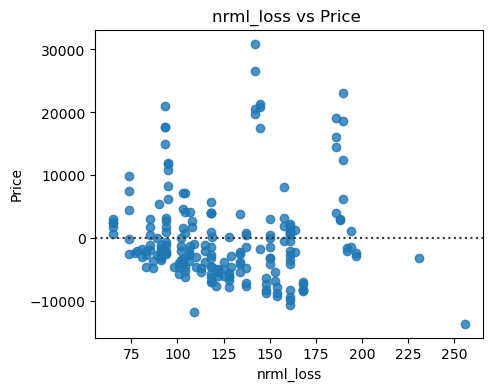

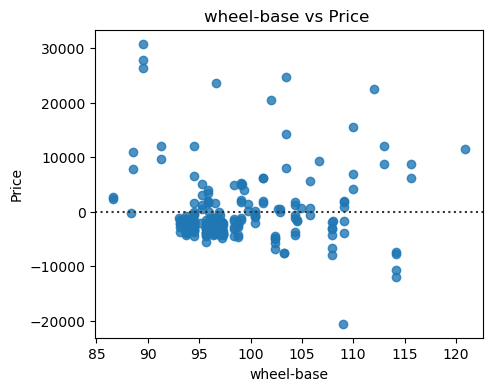

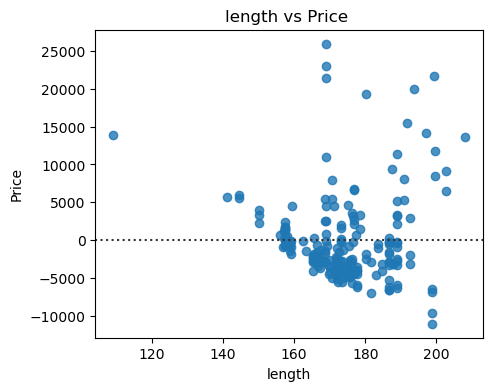

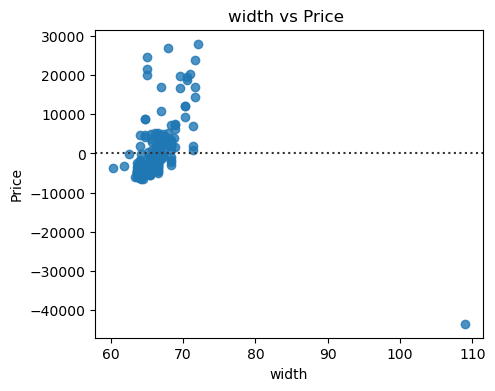

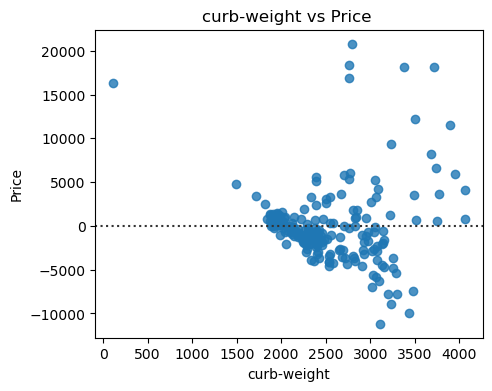

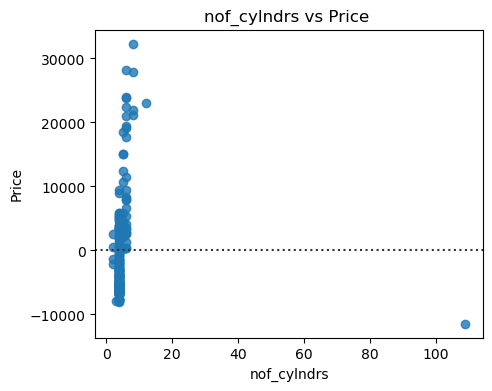

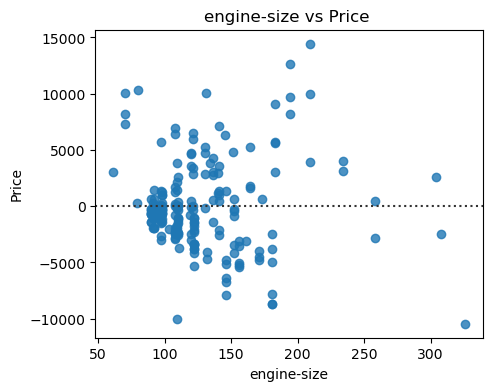

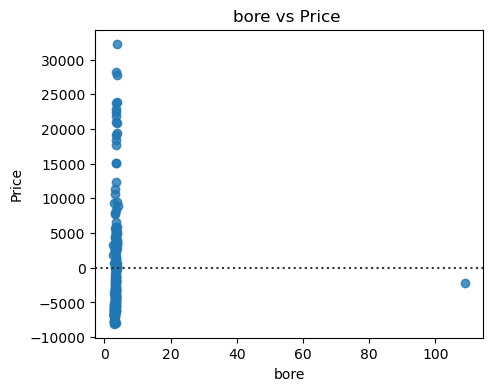

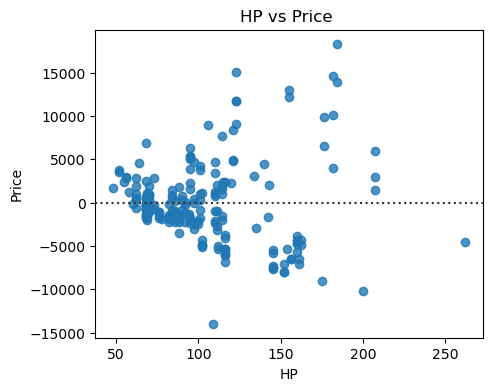

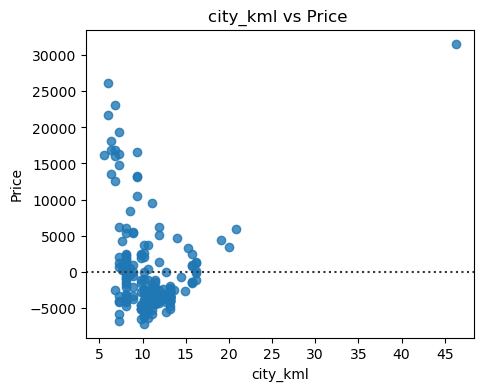

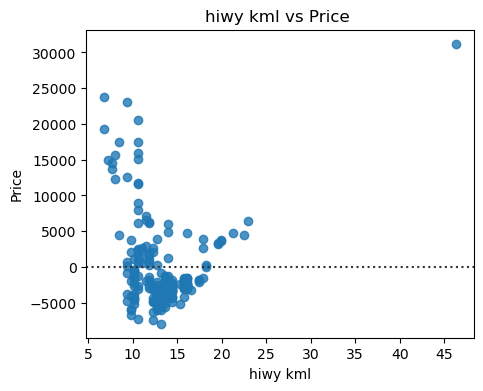

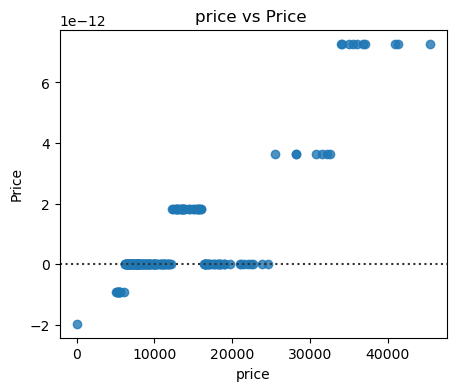

In [98]:
for i in initiator_cols:
    plt.figure(figsize=(5,4))
    
    # assigning the x and y axis with data
    init_y = initiator['price']
    init_x = initiator[i]
    
    
    # making a residual plot
    sns.residplot(x=init_x , y=init_y , data = initiator)
    
    # labelling the plot
    plt.xlabel(f"{i}")
    plt.ylabel(f"Price")
    plt.title(f"{i} vs Price ")
    plt.show()

# Distribution Plots

## Distribution Plot for Single Linear Regression

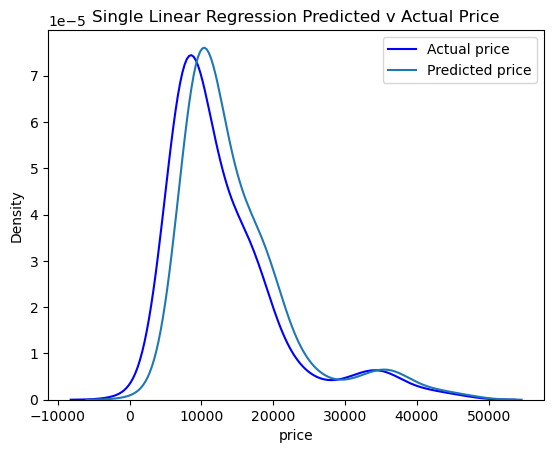

In [99]:
ax = sns.kdeplot(df_y, color='blue', label="Actual price")
sns.kdeplot(new_pred_price, color='red', label="Predicted price")
plt.title("Single Linear Regression Predicted v Actual Price")
plt.legend()
plt.show()


## Dirstribution Plot for Multiple Linear Regression

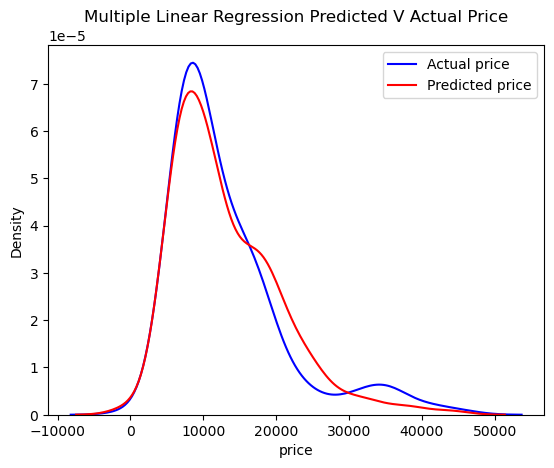

In [100]:

ax = sns.kdeplot(df_y, color='blue', label="Actual price")
sns.kdeplot(yhat_multi_predict, color='red', label="Predicted price")
plt.title("Multiple Linear Regression Predicted V Actual Price")
plt.legend()
plt.show()


# Polynomial Regression

    * For polynomial regression to occur we need pipelines (algorithm methods used (customized)) 

    * So while giving input to the pipeline we have to specify how we want our data to be handled and in what all way should we proceed

* We know that we have been following the linear regression methods which is more suitable for the data and we will also tone the data to the standard scaler format

We use pipeline so that most of the data processing or modelling process goes through the pipeline only and therefore it follows the standards that we assign accordingly without sacrifising any data 

In [101]:
sS

StandardScaler()

In [102]:
X2

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml,price
0,-0.206272,-1.680871,-0.386650,-0.543101,0.009605,-0.119070,0.078360,-0.051820,0.201582,-0.524967,-0.462029,0.047489
1,-0.206272,-1.680871,-0.386650,-0.543101,0.009605,-0.119070,0.078360,-0.051820,0.201582,-0.524967,-0.462029,0.424425
2,-0.206272,-0.710259,-0.203716,-0.163403,0.515256,0.149841,0.609001,-0.158008,1.356934,-0.754855,-0.576539,0.424425
3,1.101058,0.161646,0.207887,0.026447,-0.378367,-0.119070,-0.428161,-0.089456,-0.040236,-0.180136,-0.118498,0.104563
4,1.101058,0.095842,0.207887,0.080689,0.517095,0.015385,0.223080,-0.089456,0.309056,-0.869799,-1.034581,0.543589
...,...,...,...,...,...,...,...,...,...,...,...,...
196,-0.859937,1.691593,1.137805,0.758722,0.752452,-0.119070,0.343681,-0.010151,0.282188,-0.295080,-0.347519,0.467700
197,-0.859937,1.691593,1.137805,0.731601,0.930809,-0.119070,0.343681,-0.010151,1.518146,-0.754855,-0.691050,0.743660
198,-0.859937,1.691593,1.137805,0.758722,0.862776,0.149841,1.115522,-0.037034,0.819561,-0.869799,-0.920070,1.049724
199,-0.859937,1.691593,1.137805,0.758722,1.239716,0.149841,0.440161,-0.113651,0.067238,0.049752,-0.462029,1.173279


We know that using the X2 standardized data can lead to some errors so we can actually proceed with another standard scaler operations with the initiator dataframe

In [103]:
initiator.head(5)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml,price
symboling,,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888,13495
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888,16500
1,118.0,94.5,171.2,65.5,2823,6,152,2.68,154.0,8.077736,11.053744,16500
2,164.0,99.8,176.6,66.2,2337,4,109,3.19,102.0,10.203456,12.754320,13950
2,164.0,99.4,176.6,66.4,2824,5,136,3.19,115.0,7.652592,9.353168,17450


In [104]:
init_df_noprice = initiator.drop(columns=['price'])

In [105]:
init_df_noprice.head(3)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml
symboling,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
1,118.0,94.5,171.2,65.5,2823,6,152,2.68,154.0,8.077736,11.053744


### Polynomial Regression using numpy

In [106]:
pn_S_x = initiator['engine-size']
pn_S_y = initiator['price']

In [107]:
print(pn_S_x.ndim)
print(pn_S_y.ndim)

1
1


In [108]:
# print(pn_S_x.shape)
# print(pn_S_x.ndim)
# pn_S_x = np.array(pn_S_x).reshape(-1,1)
# print(pn_S_x.shape)
# print(pn_S_x.ndim)

# print(pn_S_y.shape)
# print(pn_S_y.ndim)
# pn_S_y = np.array(pn_S_y).reshape(-1,1)
# print(pn_S_y.shape)
# print(pn_S_y.ndim)

# After converting both into a 2 dimensional we will now flatten and see if the ndim still occurs to be 1D

# pn_S_x_flattened = pn_S_x.values.flatten()
# pn_S_y_flattened = pn_S_y.flatten()

# print(pn_S_y_flattened.ndim)
# print(pn_S_x_flattened.ndim)

# pn_S_y_new = pn_S_y.flatten()
# print(pn_S_y_new.ndim)

In [109]:
# now lets check the ndim of these new variables 

print(pn_S_x.ndim)
print(pn_S_y.ndim)

1
1


In [110]:
# fit the polynomial feature into the numpy library polyfit

pn_S = np.polyfit(pn_S_x , pn_S_y , 3)


In [111]:
# pn_S_new = pn_S.flatten()
# pn_S_new.ndim

In [112]:
pn_S_eq = np.poly1d(pn_S)

In [113]:
print(F"Polynomial Regression (Equation) Numpy :\n\n {pn_S_eq}") 

Polynomial Regression (Equation) Numpy :

            3        2
-0.006839 x + 3.76 x - 452.9 x + 2.301e+04


## Pipelines

### Polynomial Regression using SKlearn

Before we move forward we will now use the pipeline to ease our work instead of doing everything step by step on our own

In [114]:
input_pipe1 = [('scale',StandardScaler()) , ('polynomial',PolynomialFeatures(degree=2)) , ('model',LinearRegression())]

In [115]:
pipeline1 = Pipeline(input_pipe1)

#### For Single Column polynomial regression

here we are actually fitting the column 'engine-size' and the 'price' column

In [116]:
x_plnrg = pn_S_x.values.reshape(-1,1)
print(x_plnrg.ndim)
y_plnrg = pn_S_y.values.reshape(-1,1)
print(y_plnrg.ndim)

2
2


In [117]:
single_col_pipe_result = pipeline1.fit(x_plnrg , y_plnrg)

In [118]:
single_col_pipe_result

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [119]:
# lets check the accuracy of the model that we have for this pipeline with single column as its predicter

single_col_pipe_result.score(x_plnrg , y_plnrg)

0.7569936776403755

In [120]:
y_plnrg_hat_1_col = single_col_pipe_result.predict(x_plnrg)
print(y_plnrg_hat_1_col)

[[13693.62820877]
 [13693.62820877]
 [17394.15324729]
 [10145.88480778]
 [14704.50207588]
 [14704.50207588]
 [14704.50207588]
 [14704.50207588]
 [13862.19259109]
 [ 9976.56886619]
 [ 9976.56886619]
 [19405.65244593]
 [19405.65244593]
 [19405.65244593]
 [26904.96195125]
 [26904.96195125]
 [26904.96195125]
 [ 1980.18511772]
 [ 6923.0402523 ]
 [ 6923.0402523 ]
 [ 6923.0402523 ]
 [ 6923.0402523 ]
 [ 8281.53055211]
 [ 6923.0402523 ]
 [ 6923.0402523 ]
 [ 6923.0402523 ]
 [ 8281.53055211]
 [12343.88332599]
 [18065.19956874]
 [ 7262.86779797]
 [ 7262.86779797]
 [ 5051.54618351]
 [ 7262.86779797]
 [ 7262.86779797]
 [ 7262.86779797]
 [ 7262.86779797]
 [10315.16658759]
 [10315.16658759]
 [10315.16658759]
 [10315.16658759]
 [10315.16658759]
 [10315.16658759]
 [10484.41420561]
 [11837.16532549]
 [34992.2021545 ]
 [34992.2021545 ]
 [46079.41542628]
 [ 7092.97110603]
 [ 7092.97110603]
 [ 7092.97110603]
 [ 7092.97110603]
 [ 7092.97110603]
 [ 3517.24920292]
 [ 3517.24920292]
 [ 3517.24920292]
 [ 5221.85

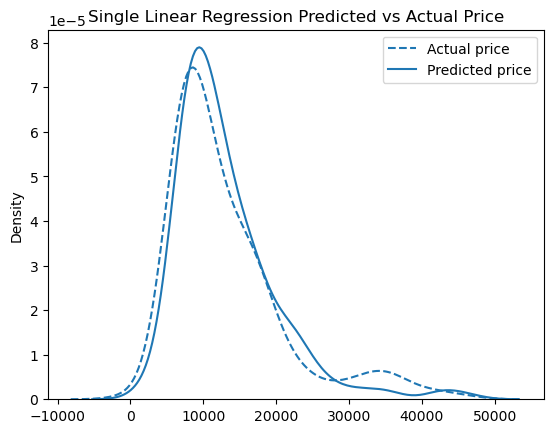

In [121]:
# we can see the plot of price difference between the predicted and actual price value for the single column

# Create figure and axis
fig1, a1 = plt.subplots()

# Plotting on the specified axis `a`
ax = sns.kdeplot(y_plnrg, color='red', label="Actual price", ax=a1, linestyle = '--')
sns.kdeplot(y_plnrg_hat_1_col, color='green', label="Predicted price", ax=ax)

plt.title("Single Linear Regression Predicted vs Actual Price")
plt.legend()
plt.show()


#### For Multiple Column Polynomial Regression

In [122]:
init_df_noprice.head(3)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml
symboling,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
1,118.0,94.5,171.2,65.5,2823,6,152,2.68,154.0,8.077736,11.053744


In [123]:
pn_S_y.head(3)

symboling
3    13495
3    16500
1    16500
Name: price, dtype: int64

In [124]:
# fitting the pipeline

multi_col_pipe_result = pipeline1.fit(init_df_noprice , pn_S_y )
multi_col_pipe_result

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [125]:
multi_col_pipe_result.score(init_df_noprice , pn_S_y )

0.9707569951753966

Now thats what I call Accuracy !!!

it's above 95 and I'm Happy for now and now lets see if theres is any way to increase the accuracy

In [126]:
# Lets predict the outcome and see for real whether it actually looks like what it says

yhat_multi_col_predict = multi_col_pipe_result.predict(init_df_noprice)

# lets see the result
print(yhat_multi_col_predict)

[13810.05707167 13810.05707167 15480.11879822 10031.52682884
 13866.00585333 14758.35367901 19253.78387644 17740.68793034
 23588.19270814 16303.1396133  16303.1396133  20859.80840277
 19661.86430423 22808.5054826  32691.23448462 37856.16491229
 33746.86063395  5587.18260791  4020.09062527  5490.4981515
  4514.51686439  7267.4998009   8478.93976708  6936.98857396
  6893.00864921  6893.00864921  8177.56647006  8725.66047629
 12964.30494211  5946.99941763  5286.47123286  7866.0108398
  7687.41017513  7883.95288059  7726.59859042  8104.37817032
  7758.68190138  8133.39993013  8781.37870519  8345.10583744
 11927.7525365   9747.8386895   8615.91533498 12195.35643606
 33765.09980935 33765.09980935 35773.85389036  6204.4360725
  7186.6916598   7193.90457763  7004.73995352  7061.82979375
 12471.23030597 12471.23030597 12578.68662865 14894.5555275
  9230.38176501  9462.79266653  9230.38176501  9462.79266653
 10739.91577455  9574.28533023 19608.60273917   109.00671725
 26090.20312792 27315.135859

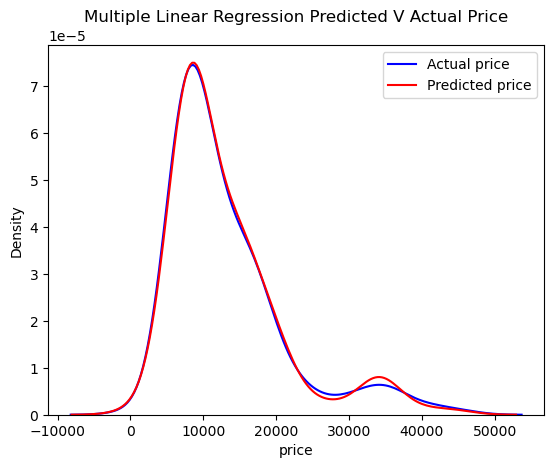

In [127]:
# Plotting on the specified axis `a`
ax = sns.kdeplot(pn_S_y, color='blue', label="Actual price")
sns.kdeplot(yhat_multi_col_predict, color='red', label="Predicted price")
plt.title("Multiple Linear Regression Predicted V Actual Price")
plt.legend()
plt.show()


As you can see the predicted and the actual price shows the 96% accuracy in the graph and it is clearly visible 

Though we may have to work on the (35000,1) axis , I think we can now move onto the next step 

Now lets veiw the scores for each model below and see what is !!

# Mean Squared Error (MSE)

In [128]:
# mean squared error for the single linear Regression 

mean_squared_error(pn_S_y , new_pred_price)

3029915.2515888596

In [129]:
# mean squared error for the multiple linear Regression 

mean_squared_error(pn_S_y, yhat_multi_predict)

10881906.423845338

In [130]:
# mean squared error for the single Polynomial Regression 

mean_squared_error(pn_S_y, y_plnrg_hat_1_col)

15444432.372027365

In [131]:
# mean squared error for the multiple Polynomial Regression 

mean_squared_error(pn_S_y, yhat_multi_col_predict)

1858559.0941953901

# R^2 coeficient determination

In [132]:
# for multiple polynomial and linear regression

pipeline1.score(init_df_noprice , pn_S_y)


0.9707569951753966

In [133]:
# for multiple linear regression

mLr.score(init_df_noprice , pn_S_y)


0.828781531323245

# Model Evaluation

In [134]:
# train test split
# We now train and test the data into 4 parts 
x_train, x_test, y_train, y_test = train_test_split(init_df_noprice , pn_S_y, test_size=40 , random_state=53 )

In [135]:
print(f"shape of x_train : {x_train.shape}")
print(f"shape of y_train : {y_train.shape}")

print(f"shape of x_test : {x_test.shape}")
print(f"shape of y_test : {y_test.shape}")


shape of x_train : (161, 11)
shape of y_train : (161,)
shape of x_test : (40, 11)
shape of y_test : (40,)


In [136]:
# custom pipeline with degree 3
pipeline_input2 = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(degree=3)),  ('model',LinearRegression())]

In [137]:
# assigning the pipeline to the variable pipeline_input2

pipeline2 = Pipeline(pipeline_input2)
pipeline2

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [138]:
# now lets fit the train data to the pipeline2 which has the degree 3

pipeline2.fit(x_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [139]:
#  Now lets check the score value for the training data and see what it gives

pipeline2.score(x_train, y_train)


0.9990058757868711

In [140]:
#  Now lets check the score value for the testing data and see what it gives

pipeline2.score(x_test, y_test)


-489.5082634641962

In [141]:
# trained data prediction 

train_predict = pipeline2.predict(x_train)
train_predict

array([11845.        ,  7053.00000001,  7957.        ,  7150.5       ,
       12964.        ,  8778.        ,  8238.        ,  7198.        ,
       17672.81967251,  6575.00000001, 16695.        ,  6338.        ,
       33278.00000001, 33900.        ,  7295.        ,  7799.        ,
       10698.        , 37027.99999999,  6918.00000001,  6189.        ,
        6229.        , 12170.        , 13200.        , 17425.        ,
        5399.        , 13950.        , 15749.99999999, 17075.        ,
       10345.        , 13495.        , 10795.        ,  7775.        ,
        9095.        ,  7999.        , 13295.        , 41315.        ,
        6795.        , 25552.        , 14868.99999999, 31600.        ,
        5498.99999999,  9538.        ,  5389.        , 10898.        ,
        8495.        , 16500.        , 22470.00000001, 22625.        ,
       28248.        , 12440.        ,  9960.        ,  6669.        ,
       12945.        ,  8189.        ,  7395.        , 16845.        ,
      

In [142]:
# test data prediction 

test_predict = pipeline2.predict(x_test)
test_predict

array([ 1.02450000e+04,  3.10587499e+03,  1.14932951e+04,  2.14844609e+04,
        4.40328352e+03,  2.53318982e+04,  9.93788715e+04,  1.34950000e+04,
       -7.09976811e+03, -5.68291139e+04, -1.74792698e+04,  5.62464260e+04,
        8.71611280e+03,  1.73224088e+04,  1.23734744e+04,  1.18450000e+04,
        2.06376371e+03,  1.94149793e+04,  1.08924879e+05,  2.60540876e+03,
       -9.07060492e+04,  7.94900257e+03,  4.10094960e+02,  9.51015155e+03,
        3.02367752e+04,  4.71614872e+03, -6.89792613e+04,  1.20451545e+05,
        1.91770658e+04,  1.12160152e+06,  1.99286157e+04,  3.73459842e+03,
        1.08980000e+04, -7.46977868e+04, -3.61006259e+03,  8.32755028e+03,
        5.59002675e+01,  1.77664971e+04, -1.64576267e+03, -3.41474624e+05])

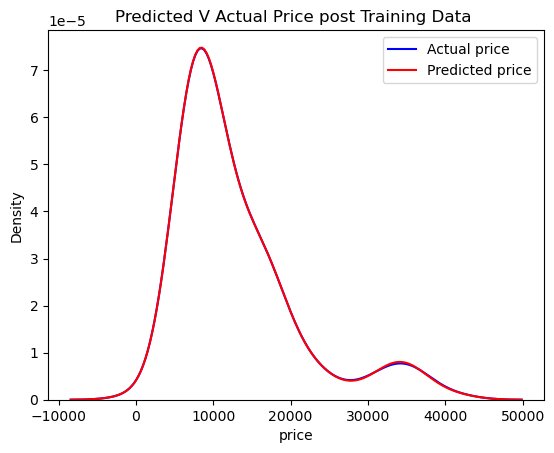

In [143]:
# Plotting on the specified axis `a`
ax = sns.kdeplot(y_train, color='blue', label="Actual price")
sns.kdeplot(train_predict, color='red', label="Predicted price")
plt.title("Predicted V Actual Price post Training Data ")
plt.legend()
plt.show()


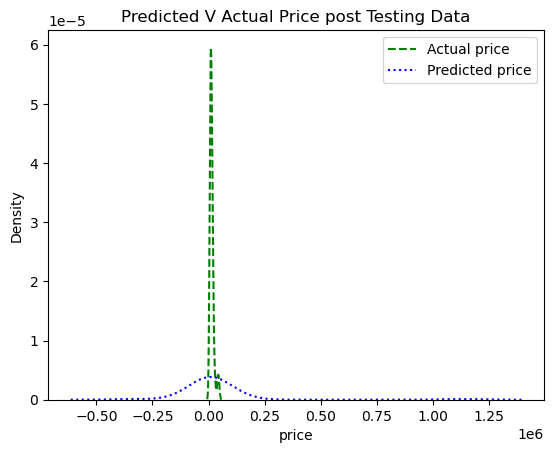

In [144]:
# Plotting on the specified axis `a`
ax = sns.kdeplot(y_test, color='green', label="Actual price",linestyle='--')
sns.kdeplot(test_predict, color='blue', label="Predicted price",linestyle=':')
plt.title("Predicted V Actual Price post Testing Data")
plt.legend()
plt.show()


# K-Fold Cross Validation with Linear Regression

Just because cross validation is better than random sampling that's why we use this method

In [145]:
new_x_cv = init_df_noprice
new_y_cv = init_y

In [146]:
cv_score = cross_val_score(LinearRegression(), new_x_cv , new_y_cv , cv=4)
cv_score

array([ 0.81504452, -0.13111949,  0.35312385,  0.3553099 ])

In [147]:
np.mean(cv_score)

0.3480896962664754

In [148]:
yhat_cross = cross_val_predict(LinearRegression() , new_x_cv , new_y_cv , cv=4)
yhat_cross

array([11296.06210513, 11296.06210513, 19158.03774553, 11086.18844714,
       15398.91671355, 14081.85424366, 20008.4411672 , 20342.27956168,
       21996.16819999,  8939.84484602,  8939.84484602, 15500.82613045,
       15667.74532769, 17671.96073165, 24283.76385505, 25452.05684636,
       29437.31109844,  -825.34046375,  6083.05486103,  5832.51652365,
        6010.47131695,  6108.85105209,  9114.79657268,  6362.52449799,
        6429.29217689,  6429.29217689,  9283.49297271,  9794.25522182,
       17955.87330626,  6982.81876312,  8191.62659796,  6013.4979323 ,
        7952.63331403,  8001.19162595,  6502.39325243,  7229.14822894,
        9822.62736355,  9983.4767718 ,  9038.15330234,  5667.93651534,
       10218.94952671, 11629.04782748,  4497.86615712, 11078.42574578,
       31870.00211893, 31870.00211893, 44988.35699285,  6054.34547281,
        6485.26397088,  6500.43844336,  5633.96888321,  6619.86284587,
        8369.0677123 ,  8369.0677123 ,  8382.57729235, 12252.8093805 ,
      

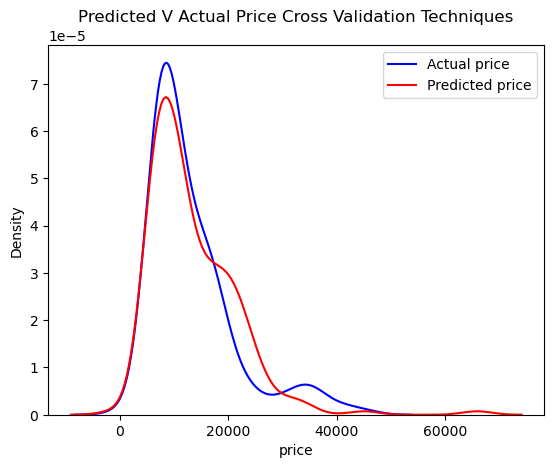

In [149]:
# Plotting on the specified axis `a`
ax = sns.kdeplot(new_y_cv, color='blue', label="Actual price")
sns.kdeplot(yhat_cross, color='red', label="Predicted price")
plt.title("Predicted V Actual Price Cross Validation Techniques")
plt.legend()
plt.show()

# Polynomial Regression and Parameters

Here we will be working with alpha parameters and various degrees 

In [150]:
print(f"shape of x_train : {x_train.shape}")
print(f"shape of y_train : {y_train.shape}")

print(f"shape of x_test : {x_test.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of x_train : (161, 11)
shape of y_train : (161,)
shape of x_test : (40, 11)
shape of y_test : (40,)


In [151]:
# we will train the data with various polynomial degrees and see their accuracies 

trained_squared_coef = []
testing_squared_coef = []
polynomial_degrees_ = [1,2]

for i in polynomial_degrees_:
    # intializing the polynomial and linear regression
    Pr = PolynomialFeatures(degree=i)
    Lr = LinearRegression()
    
    # fitting the train data and transforming both test and train data 
    x_train_Pr = Pr.fit_transform(x_train)
    x_test_Pr = Pr.transform(x_test)
    
    # fitting the model 
    Lr.fit(x_train_Pr , y_train)
    
    # Evaluating the test and train data
    trained_eval = Lr.score(x_train_Pr , y_train)
    tested_eval = Lr.score(x_test_Pr, y_test)
    
    # appending the scores 
    trained_squared_coef.append(round(trained_eval,2))
    testing_squared_coef.append(round(tested_eval,2))


In [152]:
print(trained_squared_coef)
print(testing_squared_coef)

[0.82, 0.88]
[0.83, 0.16]


Here we can see that only the the 1st degree has both valid train and test results rest of them provide less accurate training results but more accurate testing results which can result in overfitting , here we need both the training and testing data to be close to the number 1 which provide accuracy 

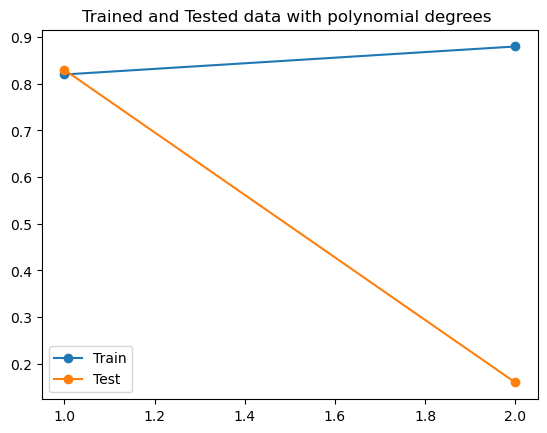

In [153]:
# we will now plot the test and train data that we got from fit and training it through our most of the polynomial degrees
plt.plot(polynomial_degrees_ , trained_squared_coef , 'o-' , label="Train")
plt.plot(polynomial_degrees_ , testing_squared_coef , 'o-' , label="Test")
plt.title("Trained and Tested data with polynomial degrees ")
plt.legend()
plt.show()

From the above chart we are now convinced that the 1st polynomial degree is best suited for our data and remaining degrees provide overfitting results

# Ridge Regression

In [154]:
print(f"shape of x_train : {x_train.shape}")
print(f"shape of y_train : {y_train.shape}")

print(f"shape of x_test : {x_test.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of x_train : (161, 11)
shape of y_train : (161,)
shape of x_test : (40, 11)
shape of y_test : (40,)


In [155]:
Rd_train_squared = []
Rd_test_squared = []
alpha_features = [0.0001,0.001,0.01,0.1,1,10]

for i in alpha_features :
    # creating an object for the Ridge Regression
    Rd = Ridge(alpha=i)
    
    # Fitting the model
    Rd_model = Rd.fit(x_train, y_train)
    
    # evaluate the models test and training scores
    Rd_train_score = Rd.score(x_train, y_train)
    Rd_test_score = Rd.score(x_test, y_test)
    
    # appending the scores to the appropriate lists
    Rd_train_squared.append(round(Rd_train_score*100,10))
    Rd_test_squared.append(round(Rd_test_score*100,10))


In [156]:
# print(f"Train :{Rd_train_squared}")
# print(f"Test :{Rd_test_squared}")
rd_list = {'alpha':alpha_features , 'Train':Rd_train_squared , 'Test':Rd_test_squared}
Rd_df = pd.DataFrame(rd_list)

In [157]:
Rd_df

,alpha,Train,Test
0,0.0001,82.255027,83.291869
1,0.0010,82.255027,83.291884
2,0.0100,82.255027,83.292028
3,0.1000,82.255025,83.293465
4,1.0000,82.254811,83.306904
5,10.0000,82.242415,83.378777


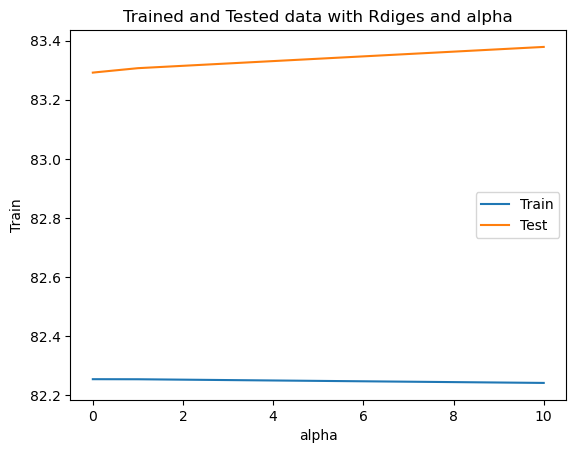

In [158]:
# we will now plot the test and train data that we got from fit and training it through our most of the ridge plot with alphas
sns.lineplot(Rd_df , x= 'alpha' , y='Train' , label = 'Train')
sns.lineplot(Rd_df , x= 'alpha' , y='Test' ,label = 'Test')
plt.title("Trained and Tested data with Rdiges and alpha")
plt.legend()
plt.show()

# Ridge Regression With K-Fold Cross Validation

In [159]:
 new_x_cv.head(3)

,nrml_loss,wheel-base,length,width,curb-weight,nof_cylndrs,engine-size,bore,HP,city_kml,hiwy kml
symboling,,,,,,,,,,,
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
3,118.0,88.6,168.8,64.1,2548,4,130,3.47,111.0,8.928024,11.478888
1,118.0,94.5,171.2,65.5,2823,6,152,2.68,154.0,8.077736,11.053744


In [160]:
new_y_cv.head(3)

symboling
3    13495
3    16500
1    16500
Name: price, dtype: int64

In [161]:
Rd_scores = []
alpha_features = [10,100,1000,10000,100000,1000000]

for i in alpha_features :
    # creating an object for the Ridge Regression
    Rd = Ridge(alpha=i)
    scores_cv = cross_val_score(Rd , new_x_cv , new_y_cv , cv = 3)
    Rd_scores.append(round((np.mean(scores_cv)*100),3))

In [162]:
Rd_kf_cv_df = {'alpha':alpha_features , 'scores':Rd_scores}
Rd_cv_df = pd.DataFrame(Rd_kf_cv_df)

In [163]:
Rd_cv_df

,alpha,scores
0,10,-182.129
1,100,41.178
2,1000,65.049
3,10000,68.717
4,100000,71.040
5,1000000,63.396


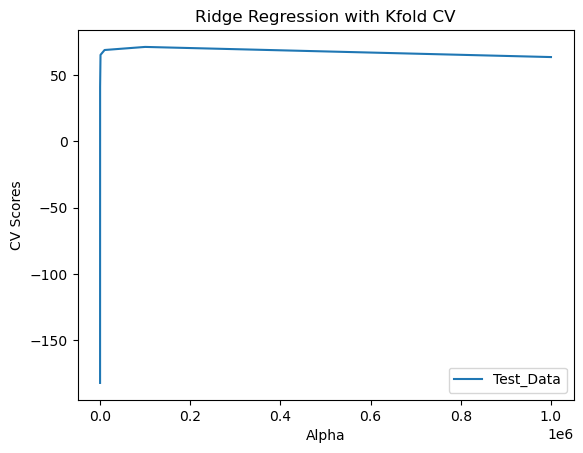

In [164]:
# lineplot for the cv with rd
sns.lineplot(Rd_cv_df , x= 'alpha', y = 'scores' , label='Test_Data' )
plt.title("Ridge Regression with Kfold CV")
plt.xlabel('Alpha')
plt.ylabel('CV Scores')
plt.show()

# Grid Search CV & Ridge Regression

In [165]:
# specify the parameters for the alpha
parameters1 = [{'alpha':[10,100,1000,10000,100000,1000000]}]

# specify the gridsearchcv
Grid = GridSearchCV(Rd , param_grid=parameters1 , cv=3 )

# fit the grid to the data
Grid.fit(new_x_cv, new_y_cv)

GridSearchCV(cv=3, estimator=Ridge(alpha=1000000),
             param_grid=[{'alpha': [10, 100, 1000, 10000, 100000, 1000000]}])

In [166]:
# now lets store the result in a variable called result
results = Grid.cv_results_
grid_result = pd.DataFrame(results)
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004344,0.001253,0.002546,0.000790,10,{'alpha': 10},-6.566078,0.678283,0.423935,-1.821287,3.356680,6
1,0.003358,0.000466,0.002313,0.001262,100,{'alpha': 100},0.104793,0.677915,0.452638,0.411782,0.235753,5
2,0.002671,0.000472,0.003001,0.000009,1000,{'alpha': 1000},0.779579,0.688882,0.483020,0.650494,0.124075,3
3,0.003326,0.000472,0.002668,0.000477,10000,{'alpha': 10000},0.820632,0.701343,0.539548,0.687175,0.115189,2
4,0.002671,0.000478,0.002329,0.000464,100000,{'alpha': 100000},0.823568,0.672920,0.634721,0.710403,0.081525,1
5,0.003038,0.000813,0.002174,0.000247,1000000,{'alpha': 1000000},0.754414,0.598367,0.549101,0.633960,0.087516,4


In [167]:
# find the best result through looking at the ranks of the grid search 
best_result_for_gridsearchcv = grid_result[(grid_result['rank_test_score']==1)]
best_result_for_gridsearchcv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.002671,0.000478,0.002329,0.000464,100000,{'alpha': 100000},0.823568,0.67292,0.634721,0.710403,0.081525,1
